<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/daily_challengeW4D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/sample_data/global_power_plant_database.csv")

In [6]:
print(df.head())
print(df.columns)
print(df.shape)

  country country_long                                               name  \
0     AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2     AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3     AFG  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4     AFG  Afghanistan            Northwest Kabul Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude  fuel1 fuel2 fuel3  ...  \
0  GEODB0040538        33.00   32.3220    65.1190  Hydro   NaN   NaN  ...   
1  GEODB0040541        66.00   34.5560    69.4787  Hydro   NaN   NaN  ...   
2  GEODB0040534       100.00   34.6410    69.7170  Hydro   NaN   NaN  ...   
3  GEODB0040536        11.55   34.4847    70.3633  Hydro   NaN   NaN  ...   
4  GEODB0040540        42.00   34.5638    69.1134    Gas   NaN   NaN  ...   

  owner  source                                 url geolocation_source  \


In [8]:
nan_counts_per_column = df.isna().sum()
print(nan_counts_per_column)

country                         0
country_long                    0
name                           20
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
fuel1                           3
fuel2                       26959
fuel3                       28368
fuel4                       28556
commissioning_year          13712
owner                       10571
source                          0
url                             0
geolocation_source            421
year_of_capacity_data       12519
generation_gwh_2013         28225
generation_gwh_2014         28209
generation_gwh_2015         27706
generation_gwh_2016         20338
estimated_generation_gwh     1128
dtype: int64


In [13]:
for col in ["commissioning_year", "owner"]:
    if col in df.columns:
        df = df.drop(columns=[col])

df['estimated_generation_gwh'] = df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean())


In [15]:
print(df.describe())

        capacity_mw       latitude     longitude  year_of_capacity_data  \
count  28664.000000   28664.000000  2.866400e+04           16145.000000   
mean     186.097600      68.817502  9.925621e+01            2016.035367   
std      523.027253    3610.172087  1.092781e+04               1.258145   
min        1.000000     -77.847000 -1.799777e+02            2000.000000   
25%        4.795850      28.010225 -7.905747e+01            2016.000000   
50%       18.640000      39.950000 -3.928400e+00            2016.000000   
75%       99.200000      46.980275  2.100702e+01            2016.000000   
max    22500.000000  415750.000000  1.075744e+06            2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           439.000000           455.000000           958.000000   
mean           2339.270238          2622.049124          1859.660249   
std            4384.011370          4138.194312          3965.618811   
min               0.000000          

In [18]:
df['country'].value_counts()


,count
country,
USA,8119
CHN,2901
GBR,2567
BRA,2340
FRA,2018
...,...
MNG,2
LSO,1
GNB,1


In [20]:
df['fuel1'].value_counts()

,count
fuel1,
Hydro,7034
Solar,5424
Wind,5084
Gas,3068
Oil,2925
Coal,2172
Biomass,1290
Waste,1143
Nuclear,199


In [22]:
df.groupby("fuel1")['capacity_mw'].mean()


,capacity_mw
fuel1,
Biomass,23.610156
Coal,856.422836
Cogeneration,106.395349
Gas,384.457545
Geothermal,67.479301
Hydro,148.687422
Nuclear,2053.329447
Oil,163.409173
Other,60.836111


In [25]:
coal = df[df['fuel1'] == 'Coal']['capacity_mw']
bio = df[df['fuel1'] == 'Biomass']['capacity_mw']

print(coal)
print(bio)

94        620.00
101       361.00
117      1982.20
140        13.20
194        70.12
          ...   
28632     735.00
28635    1244.00
28636    1245.00
28656     300.00
28662     920.00
Name: capacity_mw, Length: 2172, dtype: float64
350       30.000
402       30.000
433       20.000
465       10.500
466       50.000
          ...   
28358    161.000
28360     12.000
28499     12.000
28530     10.000
28658     12.237
Name: capacity_mw, Length: 1290, dtype: float64


In [28]:
coal.mean(), bio.mean()
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(coal, bio, equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 45.982282076525465
p-value: 0.0


In [29]:
print(df['year_of_capacity_data'].unique())


[2017.   nan 2015. 2012. 2013. 2016. 2014. 2000. 2009. 2010. 2018.]


In [32]:
table = pd.crosstab(df["year_of_capacity_data"], df["fuel1"])
table

fuel1,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind
year_of_capacity_data,,,,,,,,,,,,,,,
2000.0,10,0,0,0,0,48,0,0,0,0,0,0,0,0,0
2009.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2012.0,24,35,0,124,0,76,0,35,0,0,4,0,50,0,52
2013.0,6,1,0,2,0,0,0,0,0,0,10,0,0,0,1
2014.0,1,0,0,1,0,19,0,0,0,0,5,0,0,0,1
2015.0,22,14,0,56,0,70,3,102,4,0,9,0,0,0,11
2016.0,331,629,43,1257,70,1962,78,1587,9,8,2928,39,953,7,2002
2017.0,510,44,0,257,9,1319,10,667,3,0,116,0,17,1,418


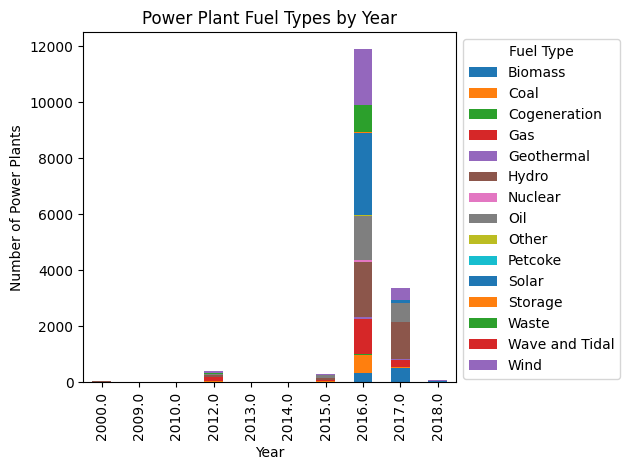

In [38]:
table.plot(kind="bar", stacked=True)
plt.title("Power Plant Fuel Types by Year")
plt.xlabel("Year")
plt.ylabel("Number of Power Plants")
plt.legend(title="Fuel Type", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


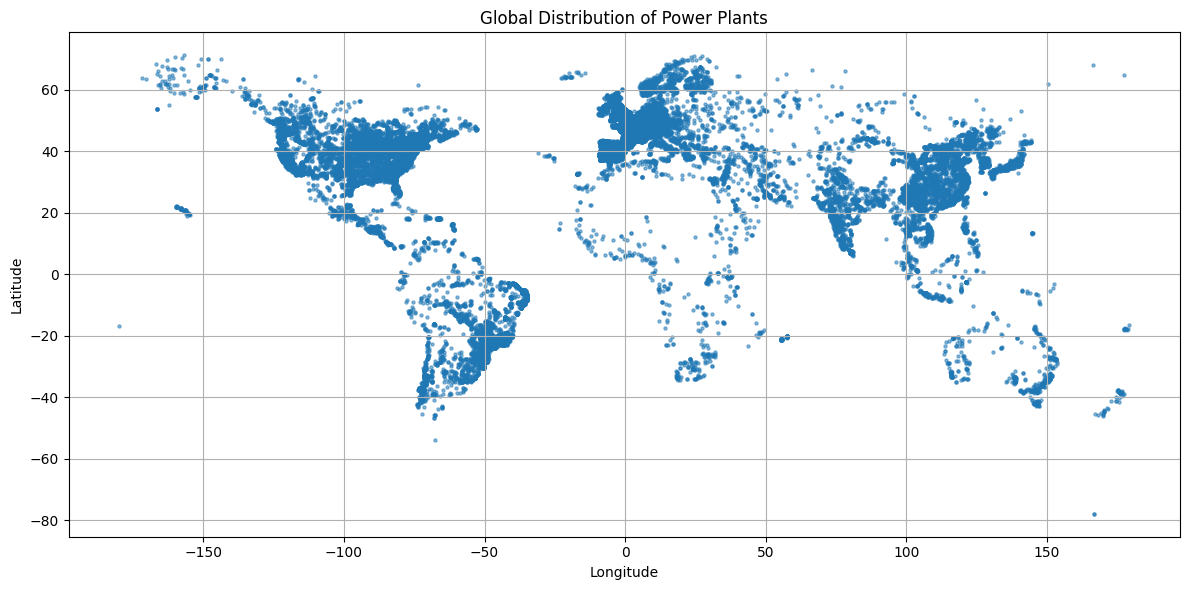

In [40]:
# סינון רק לתחנות עם קואורדינטות תקינות
df_clean = df[
    (df['latitude'].between(-90, 90)) &
    (df['longitude'].between(-180, 180))
]
plt.figure(figsize=(12, 6))

# ציור נקודות מיקום (קו אורך, קו רוחב)
plt.scatter(df_clean['longitude'], df_clean['latitude'], s=5, alpha=0.5)

# תוספות קוסמטיות
plt.title("Global Distribution of Power Plants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.show()


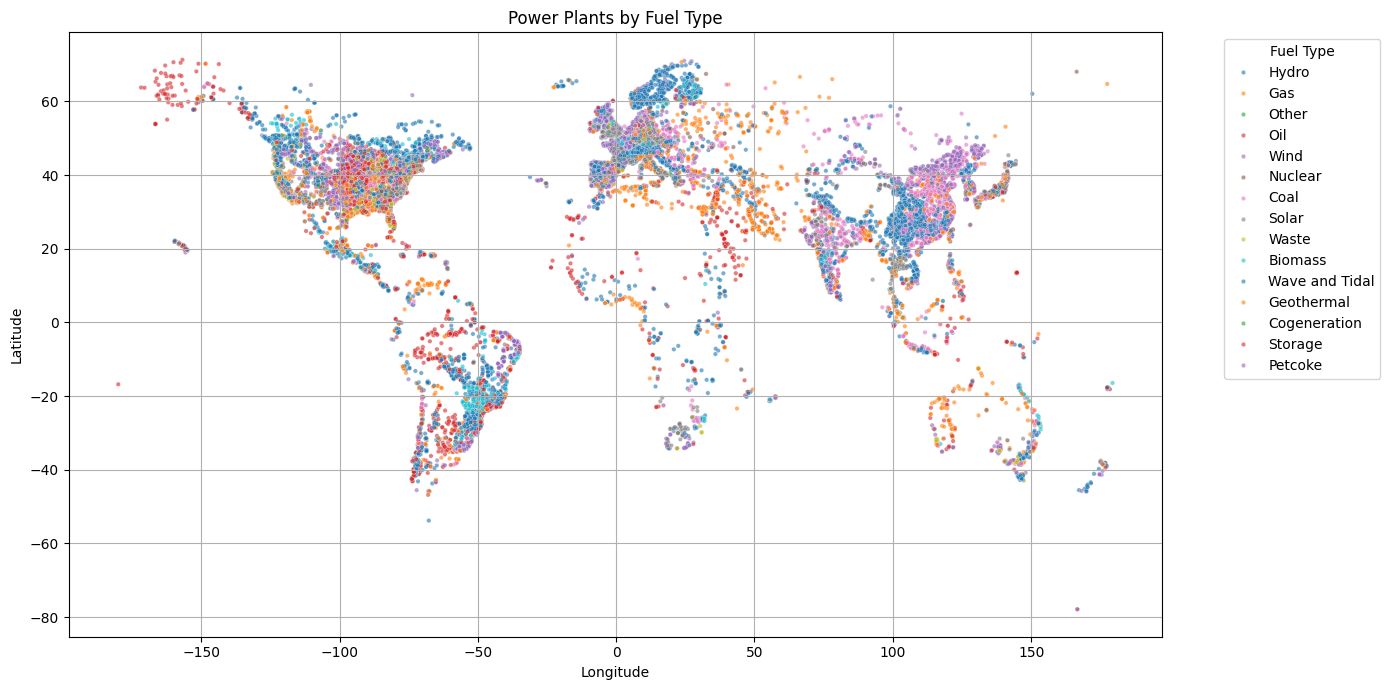

In [41]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_clean,
    x='longitude',
    y='latitude',
    hue='fuel1',
    alpha=0.6,
    s=10,
    palette='tab10'
)
plt.title("Power Plants by Fuel Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
matrix_data = df_clean[['capacity_mw', 'latitude', 'longitude', 'estimated_generation_gwh']].dropna()
X = matrix_data.to_numpy()
cov_matrix = np.cov(X, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [7.15928659e+06 5.87978582e+04 5.65436515e+03 5.69065736e+02]

Eigenvectors:
 [[-1.73981527e-01  9.84549963e-01  1.97553562e-02  1.23477400e-03]
 [-1.60802133e-05 -1.76415676e-03  2.52957144e-02  9.99678455e-01]
 [-4.96488040e-03  1.91458917e-02 -9.99483594e-01  2.53244910e-02]
 [-9.84736400e-01 -1.74045089e-01  1.54847806e-03 -3.62163903e-04]]
